# Imports

In [1]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import uproot
import pickle
import pandas as pd
import numpy as np
import math
%matplotlib inline

# Load Data:

In [2]:
eventsWithReg_EB = pd.read_pickle("run3_1.pkl")


In [3]:
xtest = pd.read_pickle("xtest_run3_1.pkl")
ytest = pd.read_pickle("ytest_run3_1.pkl")
events_test = pd.read_pickle("events_test_run3_1.pkl")

In [4]:
events_test.keys()

Index(['true', 'p', 'ecal', 'hcal', 'ho', 'eta', 'phi', 'charge', 'dr',
       'Eecal', 'Ehcal', 'pfcID', 'pfcs', 'correcal', 'corrhcal', 'Ccorrecal',
       'Ccorrhcal', 'run', 'evt', 'lumiBlock', 'time'],
      dtype='object')

# Definitions:

In [5]:
Ptrange_0_10_1000_int = [0,10,1000]
def Ptrange_0_10_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 1000
    
    return lowPt, highPt   

# Variables:

# Loading models and making predicitons:

In [6]:
XGBR = pickle.load(open('XGBR_model_run3_1.sav', 'rb'))
ETR = pickle.load(open('ETR_model_run3_1.sav', 'rb'))

#NSVR = pickle.load(open('NSVR_model_FULL_PT1.sav', 'rb'))
#SVR = pickle.load(open('SVR_model_FULL_PT1.sav', 'rb'))
HGBR = pickle.load(open('HGBR_model_run3_1.sav', 'rb'))
ADA = pickle.load(open('ADA_model_run3_1.sav', 'rb'))
KNR = pickle.load(open('KNR_model_run3_1.sav', 'rb'))
RFR = pickle.load(open('RFR_model_run3_1.sav', 'rb'))

In [7]:
ypred_XGBR = np.array(XGBR.predict(xtest, ntree_limit=XGBR.best_ntree_limit))
ypred_ETR = np.array(ETR.predict(xtest))
#ypred_NSVR = np.array(NSVR.predict(xtest))
#ypred_SVR = np.array(SVR.predict(xtest))
ypred_HGBR = np.array(HGBR.predict(xtest))
ypred_ADA = np.array(ADA.predict(xtest))
ypred_KNR = np.array(KNR.predict(xtest))
ypred_RFR = np.array(RFR.predict(xtest))

C:\Users\jonla\anaconda4\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [8]:
ETR.score(xtest,ytest)

0.9911210554962622

# Creating Dataframe:

In [9]:
eta = np.array(xtest["eta"])[:10000]
phi = np.array(xtest["phi"])[:10000]
#hcal = np.array(xtest["hcal"])[:10000]
#ecal = np.array(xtest["ecal"])[:10000]
eraw = np.array(events_test['ecal']+events_test['hcal'])[:10000]
etrue = np.array(events_test["true"])[:10000]
ecorr = np.array(events_test['Ccorrecal']+events_test['Ccorrhcal'])[:10000]
genPt = np.array(events_test["p"])[:10000]
tgtvar = np.array(ytest)[:10000]

In [10]:
rawDivGen = np.divide(eraw, etrue)[:10000]
#e91XDivGen = np.divide(e91X,  etrue)[:10000]
xgbrDivGen = np.divide(ypred_XGBR,  tgtvar)[:10000]
etrDivGen = np.divide(ypred_ETR,  tgtvar)[:10000]
#nsvrDivGen = np.divide(ypred_NSVR,  events_test['genEnergy'])[:10000]
corrDivGen = np.divide(ecorr,  etrue)[:10000]
#svrDivGen = np.divide(ypred_SVR,  events_test['genEnergy'])[:10000]
hgbrDivGen = np.divide(ypred_HGBR,  tgtvar)[:10000]
adaDivGen = np.divide(ypred_ADA,  tgtvar)[:10000]
knrDivGen = np.divide(ypred_KNR,  tgtvar)[:10000]
rfrDivGen = np.divide(ypred_RFR,  tgtvar)[:10000]

In [11]:
df = pd.DataFrame({
    #'events':events,
    #genPt':genPt,
    #'genEta':genEta,
    #'clusPt':clusPt,
    'eraw':eraw,
    'ecorr':ecorr,
    #'e91X' :e91X,
    'etrue':etrue,
    'rawDivGen':rawDivGen,
    #'e91XDivGen':e91XDivGen,
    'xgbrDivGen':xgbrDivGen,
    #'nsvrDivGen':nsvrDivGen,
    #'svrDivGen':svrDivGen,
    'hgbrDivGen':hgbrDivGen,
    'adaDivGen':adaDivGen,
    'knrDivGen':knrDivGen,
    'rfrDivGen':rfrDivGen,
    'etrDivGen':etrDivGen,
    'corrDivGen':corrDivGen,
    'genPt':genPt
})
#df[['rawDivGen','xgbrDivGen','hgbrDivGen','adaDivGen','knrDivGen','rfrDivGen','etrDivGen','corrDivGen',]]


# create columns which bins corrE/genE for each regression

In [12]:
df['binned_corrDivGen'] = pd.cut(df['corrDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_e91XDivGen'] = pd.cut(df['e91XDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_nsvrDivGen'] = pd.cut(df['nsvrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_xgbrDivGen'] = pd.cut(df['xgbrDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_svrDivGen'] = pd.cut(df['svrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_hgbrDivGen'] = pd.cut(df['hgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_adaDivGen'] = pd.cut(df['adaDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_knrDivGen'] = pd.cut(df['knrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_rfrDivGen'] = pd.cut(df['rfrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_etrDivGen'] = pd.cut(df['etrDivGen'], bins = np.arange(.6,1.8,.01))

# create columns which bin genPt

In [14]:



div_bins_0_10_1000_int = Ptrange_0_10_1000_int
div_bins_0_10_1000_int = np.array(div_bins_0_10_1000_int)
df['binned_genPt_0_10_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_10_1000_int, labels = ['0','1'])


# separate genPt bins into separate lists and concatenate those lists into a dictionary "dict_of_genPt_lists":

In [15]:

    
dict_of_genPt_lists_3 = []
for i in range(0,10):
    dict_of_genPt_lists_3.append(df[df['binned_genPt_0_10_1000_int'] == str(i)])
    


# RMSE comparisons:

In [16]:
#e91XDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
corrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,corrDivGen)).mean()),4)
etrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
xgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,xgbrDivGen)).mean()),4)
hgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,hgbrDivGen)).mean()),4)
#svrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,svrDivGen)).mean()),4)
#nsvrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,nsvrDivGen)).mean()),4)
knrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,knrDivGen)).mean()),4)
adaDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,adaDivGen)).mean()),4)
rfrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,rfrDivGen)).mean()),4)

RMSEs = pd.DataFrame({'name' : [ 'corrDivGen_RMSE', 'etrDivGen_RMSE', 'xgbrDivGen_RMSE', 'hgbrDivGen_RMSE', 'knrDivGen_RMSE','rfrDivGen'], 
                     'RMSEs' : [ corrDivGen_RMSE, etrDivGen_RMSE, xgbrDivGen_RMSE, hgbrDivGen_RMSE, knrDivGen_RMSE,rfrDivGen_RMSE]})

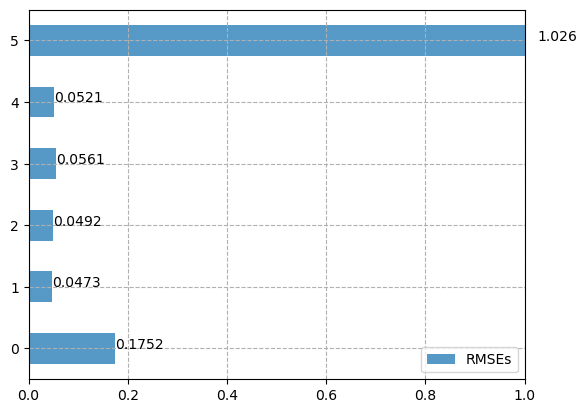

In [17]:

RMSEs.plot( kind='barh',alpha=.75)
plt.xlabel("")
plt.grid('on', ls = '--')
for index, value in enumerate(RMSEs['RMSEs']):
    plt.text(value, index,
             str(RMSEs['RMSEs'][index]))
plt.xlim([0,1])
plt.savefig('RMSEs_tgt.pdf')
plt.show()



# Histograms:

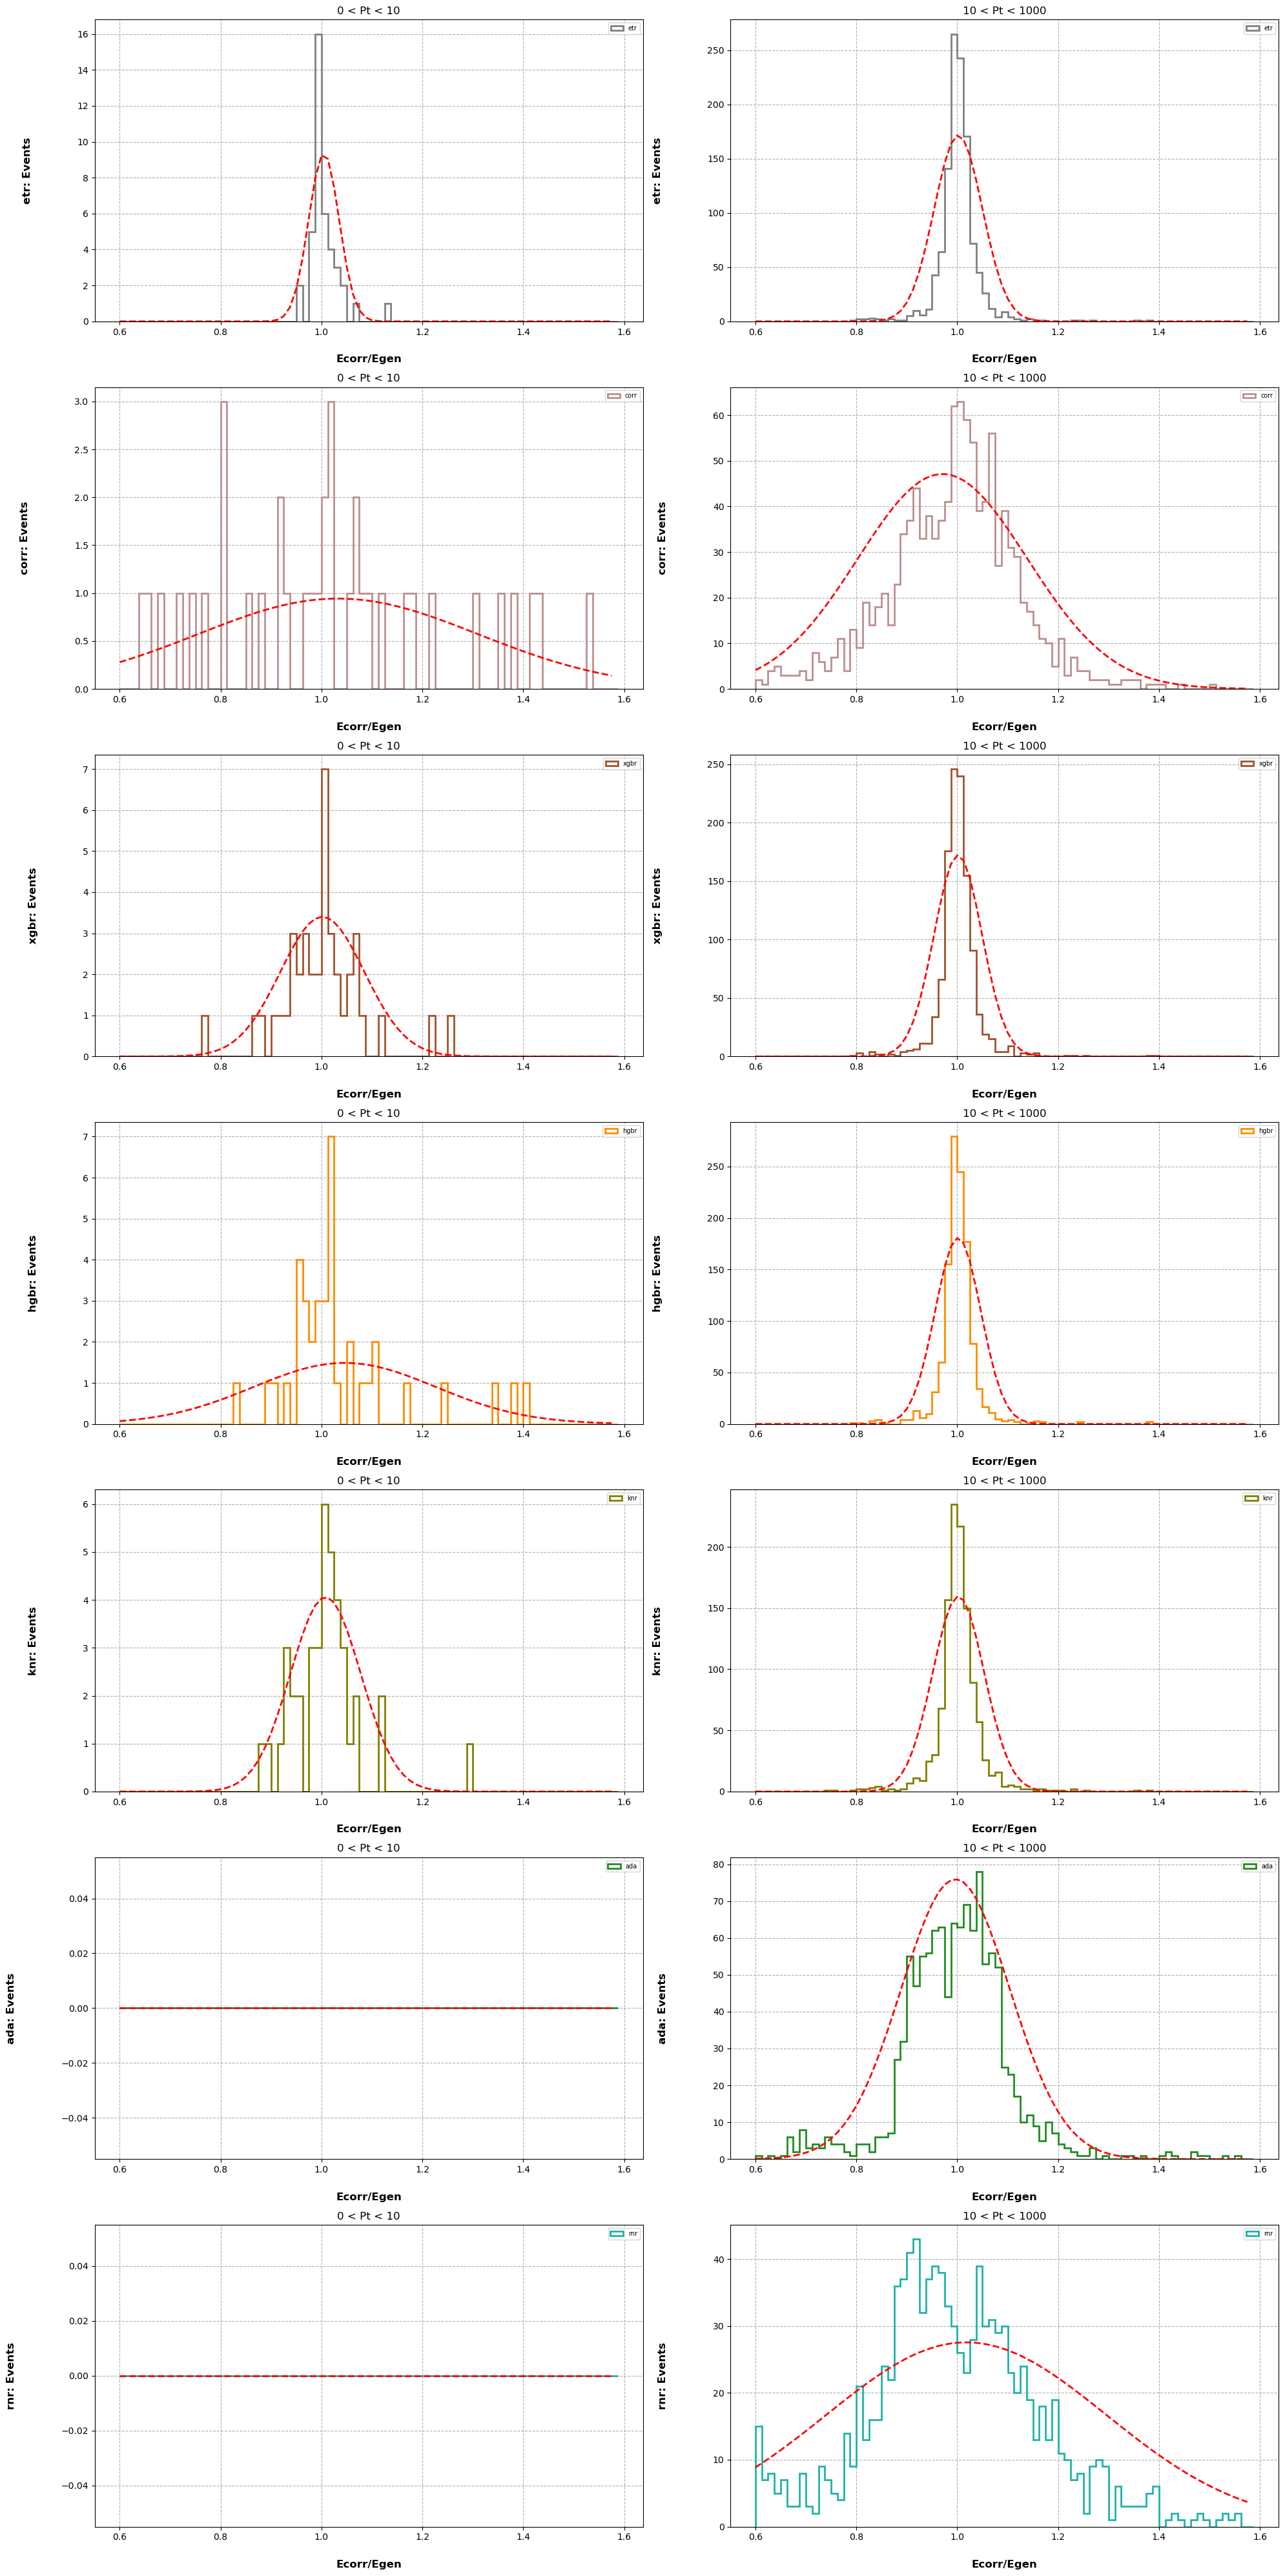

In [18]:
list_of_lists = []

fig, ax4 = plt.subplots(7,2, figsize =(20, 40),sharey=False,tight_layout=True )

for i in range(14):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    

    #print(b, " , ", a)
    
    labels = ['etr', 'corr', 'xgbr', 'hgbr', 'knr', 'ada', 'rnr']
    
    
    list_of_lists.append([
        dict_of_genPt_lists_3[a]['etrDivGen'],
        #dict_of_genPt_lists_6[a]['e91XDivGen'], 
        dict_of_genPt_lists_3[a]['corrDivGen'],
        dict_of_genPt_lists_3[a]['xgbrDivGen'],
        dict_of_genPt_lists_3[a]['hgbrDivGen'],
        #dict_of_genPt_lists_6[a]['svrDivGen'],
        #dict_of_genPt_lists_6[a]['nsvrDivGen'],
        dict_of_genPt_lists_3[a]['knrDivGen'],
        dict_of_genPt_lists_3[a]['adaDivGen'],
        dict_of_genPt_lists_3[a]['rfrDivGen']
        ])
    
    
            
    
    #print(list_of_lists[i][b])
    
    
    colors = ['gray', 'rosybrown', 'sienna', 'darkorange', 'olive', 'forestgreen', 'lightseagreen', 'teal', 'slateblue', 'palevioletred']
    
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][b], label = labels[b],color = colors[b], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    
    ax4[b,a].legend(prop={'size':7})
    ax4[b,a].grid('on', ls = '--')
    
    ax4[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax4[b,a].set_ylabel(labels[b] + ": Events", labelpad=50, weight='bold', size=12)
    #if i < 4: 
    ax4[b,a].set_title((str(Ptrange_0_10_1000(a)[0]) + " < Pt < " + str(Ptrange_0_10_1000(a)[1])))
    
    mun, sigma = norm.fit(list_of_lists[i][b])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    ax4[b,a].plot(bins, mean*.7* (1/((sigma*.5) * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r', ls = '--')

    
    
plt.savefig("hadron_model_comp.pdf")